# Introduccion
### Contexto y problema comercial:
Un equipo de análisis de datos de una empresa de apuestas deportivas busca mejorar su modelo de predicción de resultados de partidos de la NBA para aumentar sus ganancias. Se sabe que los resultados de los partidos pueden estar influenciados por factores como el equipo local y el porcentaje de tiros de campo. Por lo tanto, necesitamos realizar un análisis de datos exhaustivo para determinar qué variables influyen en los resultados de los partidos y cómo podemos utilizar esta información para mejorar nuestro modelo de predicción en el sistema de cuotas de una casa de apuestas.

Además también desea analizar si la hipótesis de que la mayoría de los equipos tienen mejores resultados cuando juegan en casa es cierta. Si encontramos que los equipos de la NBA realmente tienen una ventaja en casa, esto podría ser una información valiosa para tener en cuenta al realizar predicciones de resultados de partidos.

# Abstract

Como profesionales en el area de juego , se tiene en cuenta que cada ventaja es una posibilidad de victoria ante el rival y por lo tanto , un escalon mas a ser ganador del torneo. Utilizando tecnicas de analisis de datos es posible encontrar las ventajas y demostrar la consecuencia directa que tienen estas oportunidades. En base a informacion anterior , se puede hacer una investigacion y resolver las practicas beneficiosas de los jugadores y del equipo en cada uno de los juegos, es decir , es posible hacer preguntas y responderlas para obtener nuevos conocimientos sobre los equipos, los jugadores y la competencia en sí. Por ejemplo, se puede analizar la tendencia de los equipos en casa y fuera de casa, las estadísticas de los jugadores en diferentes momentos del partido, o el porcentaje de victorias y derrotas de los equipos. Además, este dataset puede ser utilizado para hacer previsiones y comparaciones entre los equipos, lo que puede ser de gran interés para los fanáticos de la NBA y para aquellos que buscan mejorar sus habilidades de análisis de datos. En resumen, este dataset es una herramienta valiosa para entender y disfrutar la NBA, y para sacar conclusiones interesantes sobre los equipos y los jugadores.

Estos datos poseen un gran valor (social y economico) para los grupos profesionales y fanaticos del deporte:

Una empresa creadora de contenido y venta de "merchandising" de un equipo (segun juegue local o visitante) puede estimar el "hype" que tendra el equipo al final del partido , permitiendo estimar los animos o las ganas de consumir productos de su equipo.

La encargada del evento puede dar mas o menos visibilidad al equipo con el que tenga acuerdos sabiendo que este tenga mayor o menor probabilidad de ganar

Todo este tipo de efectos son un conjunto de oportunidades que pueden brindarse como parte del deporte y por lo tanto , tener una mayor probabilidad de exito ante objetivos de empresas y de ganancias.

# Contexto analitico

Este dataset es un registro de los resultados de los partidos de la NBA (National Basketball Association) durante las temporadsa 2014-2021. Incluye información sobre la fecha , los equipos que jugaron, el resultado final ademas de estadísticas detalladas para cada equipo, incluyendo anotaciones, porcentaje de tiros de campo, porcentaje de tiros libres, etc.
Se tiene la hipotesis de que la mayoria de los equipos poseen mejores resultados durante un partido de local, que puede estar influenciado por la costumbre a la distancia del aro .Tambien se desea un analisis de influencia de los equipos para las sig temporadas . Haciendo uso de las siguiente variables y un analisis del mismo podremos saberlo:

GAME_DATE_EST: Fecha del partido 

GAME_STATUS_TEXT: Estado final del partido 

HOME_TEAM_ID: ID del equipo local

VISITOR_TEAM_ID: ID del equipo visitante

PTS_home: Puntos anotados por el equipo local.

FG_PCT_home: Porcentaje de tiros de campo del equipo local

PTS_away: Puntos anotados por el equipo visitante.

FG_PCT_away: Porcentaje de tiros de campo del equipo visitante

HOME_TEAM_WINS: Indicador de si el equipo local ganó el partido o no.

# Objetivo principal
Como objeetivo principal , se establece **armar un modelo de ML que permita poner un puntaje o determinar la cuota correcta** (variable *Target*) segun la posibilidad de que gane un equipo u otro en un partido. Para esto , sera necesario establecer un sistema de puntaje para las cuotas y la posibilidad de que el proximo equipo gane o pierda segun sea local o visitante (al menos con los datos que se encuentran actualmente)

# Desarrollo del código:

Primero importamos las librerías que vamos a utilizar: 

    "pip install pandas seaborn matplotlib"

Luego de esto se pasara a preparar las herramientas necesarias para el analisis

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [62]:
os.chdir('D:/Documents/GitHub/NBA_games_analitycs/data')
ds_path='games.csv'
df = pd.read_csv(ds_path)

## Limpieza de datos (Data Wrangling)

Antes de iniciar con el analisis de datos para realizar conclusiones al respecto , se hara un simple vistazo de la informacion que proporciona el dataset para encontrar posibles anormalidades y casos atipicos , con la intencion de ignorarlos si fuera necesario

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

A simple vista se puede notar que existen columnas en los que los datos son nulos

In [64]:
df_null_cells= df.isna()
null_rows=df_null_cells.any(axis=1)
df[df['PTS_home'].isnull()]

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
18320,2003-10-24,10300116,Final,1610612753,1610612762,2003,1610612753,NaN,NaN,NaN,...,NaN,NaN,1610612762,NaN,NaN,NaN,NaN,NaN,NaN,0
18321,2003-10-24,10300108,Final,1610612737,1610612764,2003,1610612737,NaN,NaN,NaN,...,NaN,NaN,1610612764,NaN,NaN,NaN,NaN,NaN,NaN,0
18322,2003-10-24,10300109,Final,1610612738,1610612751,2003,1610612738,NaN,NaN,NaN,...,NaN,NaN,1610612751,NaN,NaN,NaN,NaN,NaN,NaN,0
18323,2003-10-24,10300113,Final,1610612759,1610612745,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,0
18324,2003-10-24,10300112,Final,1610612749,1610612765,2003,1610612749,NaN,NaN,NaN,...,NaN,NaN,1610612765,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18414,2003-10-09,10300019,Final,1610612743,1610612756,2003,1610612743,NaN,NaN,NaN,...,NaN,NaN,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,0
18415,2003-10-09,10300022,Final,1610612757,1610612758,2003,1610612757,NaN,NaN,NaN,...,NaN,NaN,1610612758,NaN,NaN,NaN,NaN,NaN,NaN,0
18416,2003-10-08,10300013,Final,1610612759,1610612763,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612763,NaN,NaN,NaN,NaN,NaN,NaN,0
18423,2003-10-08,10300015,Final,1610612747,1610612744,2003,1610612747,NaN,NaN,NaN,...,NaN,NaN,1610612744,NaN,NaN,NaN,NaN,NaN,NaN,0


In [65]:
only_null_rows = df.isnull().sum()
only_null_rows

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

Como se puede ver, 99 filas no contienen datos acerca de los resultados de los juegos . Haciendo una pequeña busqueda en la web , se puede ver que no ocurrio ningun hecho en particular para que estos datos no aparescan (no se hayan jugado los partidos).
Ya que no se puede estimar los puntajes de los equipos , seria correcto **eliminarlos del dataset** para no corromper futuros analisis estadisticos.
Hay que considerar que los valores durante esa temporada (2003) puede tener cierta modificacion por la eliminacion de estos registros

In [66]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25697 non-null  object 
 1   GAME_ID           25697 non-null  int64  
 2   GAME_STATUS_TEXT  25697 non-null  object 
 3   HOME_TEAM_ID      25697 non-null  int64  
 4   VISITOR_TEAM_ID   25697 non-null  int64  
 5   SEASON            25697 non-null  int64  
 6   TEAM_ID_home      25697 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25697 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

In [67]:
df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.569700e+04,2.569700e+04,2.569700e+04,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,2.173597e+07,1.610613e+09,1.610613e+09,2011.832237,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.589758
std,5.460853e+06,8.641473e+00,8.655103e+00,5.380624,8.641473e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.655103e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.491887
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060117e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120045e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170072e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


# Pre-analisis exploratorio de datos (EDA)

## Análisis descriptivo con matplotlib:

Primero agruparemos los puntos convertidos por los equipos locales y los equipos de visita en total en cada temporada de la NBA

Hacemos un pequeño resumen estadístico para analizar las variables: 

In [68]:
print(df[['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away']].describe())
print('-----------------------------')
Puntos_local_agrupado = df.groupby('SEASON')['PTS_home'].sum()
Puntos_visita_agrupado = df.groupby('SEASON')['PTS_away'].sum()
print(Puntos_local_agrupado)
print('-----------------------------')
print(Puntos_visita_agrupado)

           PTS_home   FG_PCT_home      PTS_away   FG_PCT_away
count  25697.000000  25697.000000  25697.000000  25697.000000
mean     103.106044      0.460313    100.294120      0.449265
std       13.174726      0.056629     13.343016      0.055528
min       36.000000      0.250000     33.000000      0.244000
25%       94.000000      0.421000     91.000000      0.412000
50%      103.000000      0.459000    100.000000      0.448000
75%      112.000000      0.500000    109.000000      0.487000
max      168.000000      0.684000    168.000000      0.687000
-----------------------------
SEASON
2003    122051.0
2004    134300.0
2005    140918.0
2006    141686.0
2007    142897.0
2008    143815.0
2009    144756.0
2010    143276.0
2011    107521.0
2012    141122.0
2013    145176.0
2014    143353.0
2015    146857.0
2016    150217.0
2017    148178.0
2018    154752.0
2019    139333.0
2020    140357.0
2021    118951.0
Name: PTS_home, dtype: float64
-----------------------------
SEASON
2003    117145

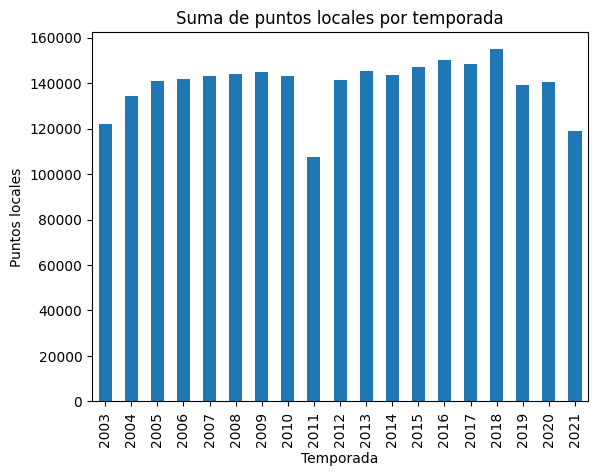

In [69]:
# graficar el resultado en un gráfico de barras
plotlocal = Puntos_local_agrupado.plot(kind='bar')
plotlocal.set_title('Suma de puntos locales por temporada')
plotlocal.set_xlabel('Temporada')
plotlocal.set_ylabel('Puntos locales')
plt.show()

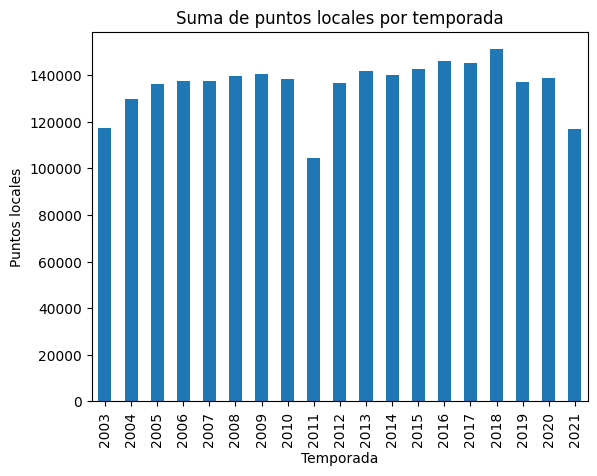

In [70]:
plotvisita = Puntos_visita_agrupado.plot(kind='bar')
plotvisita.set_title('Suma de puntos locales por temporada')
plotvisita.set_xlabel('Temporada')
plotvisita.set_ylabel('Puntos locales')
plt.show()

Se puede ver una diferencia significativa en los puntajes agrupados durante 2011 y 2021, puede haber una falla en los datos en estas temporadas

In [71]:
df.loc[df['SEASON'] == 2021].describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,1.076000e+03,1.076000e+03,1.076000e+03,1076.0,1.076000e+03,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1.076000e+03,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000
mean,2.148709e+07,1.610613e+09,1.610613e+09,2021.0,1.610613e+09,110.549257,0.461612,0.771560,0.351642,24.760223,45.063197,1.610613e+09,108.792751,0.454092,0.772916,0.347505,23.948885,44.570632,0.554833
std,2.400727e+06,8.641974e+00,8.650235e+00,0.0,8.641974e+00,12.286593,0.054766,0.102833,0.080339,4.994521,6.703259,8.650235e+00,12.544795,0.054443,0.104716,0.081440,4.875586,6.453384,0.497215
min,1.210000e+07,1.610613e+09,1.610613e+09,2021.0,1.610613e+09,59.000000,0.274000,0.308000,0.095000,10.000000,28.000000,1.610613e+09,74.000000,0.277000,0.375000,0.077000,8.000000,25.000000,0.000000
25%,2.210020e+07,1.610613e+09,1.610613e+09,2021.0,1.610613e+09,102.000000,0.420000,0.700000,0.300000,21.000000,40.000000,1.610613e+09,100.000000,0.418000,0.706000,0.292000,21.000000,40.000000,0.000000
50%,2.210047e+07,1.610613e+09,1.610613e+09,2021.0,1.610613e+09,110.000000,0.462000,0.773000,0.349500,25.000000,45.000000,1.610613e+09,109.000000,0.451000,0.778000,0.344000,24.000000,45.000000,1.000000
75%,2.210074e+07,1.610613e+09,1.610613e+09,2021.0,1.610613e+09,119.000000,0.500000,0.846000,0.406000,28.000000,50.000000,1.610613e+09,117.000000,0.489250,0.842000,0.400000,27.000000,49.000000,1.000000
max,2.210101e+07,1.610613e+09,1.610613e+09,2021.0,1.610613e+09,153.000000,0.653000,1.000000,0.630000,41.000000,68.000000,1.610613e+09,158.000000,0.687000,1.000000,0.583000,41.000000,68.000000,1.000000


In [72]:
df.loc[df['SEASON'] == 2011].describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,1.104000e+03,1.104000e+03,1.104000e+03,1104.0,1.104000e+03,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1.104000e+03,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,2.235046e+07,1.610613e+09,1.610613e+09,2011.0,1.610613e+09,97.392210,0.453630,0.753493,0.344514,21.380435,42.860507,1.610613e+09,94.429348,0.441467,0.751953,0.338460,20.115036,41.421196,0.594203
std,5.622968e+06,8.622171e+00,8.618988e+00,0.0,8.622171e+00,11.341528,0.057803,0.107724,0.118341,4.753604,6.526084,8.618988e+00,11.751294,0.056257,0.105114,0.122234,4.833060,6.329796,0.491268
min,1.110000e+07,1.610613e+09,1.610613e+09,2011.0,1.610613e+09,59.000000,0.289000,0.364000,0.000000,8.000000,23.000000,1.610613e+09,56.000000,0.246000,0.143000,0.000000,5.000000,24.000000,0.000000
25%,2.110025e+07,1.610613e+09,1.610613e+09,2011.0,1.610613e+09,90.000000,0.412000,0.684000,0.267000,18.000000,38.000000,1.610613e+09,86.000000,0.402000,0.688000,0.261000,17.000000,37.000000,0.000000
50%,2.110052e+07,1.610613e+09,1.610613e+09,2011.0,1.610613e+09,97.000000,0.453000,0.759000,0.348000,21.000000,43.000000,1.610613e+09,94.000000,0.442000,0.762000,0.333000,20.000000,41.000000,1.000000
75%,2.110080e+07,1.610613e+09,1.610613e+09,2011.0,1.610613e+09,104.000000,0.489000,0.826500,0.423000,24.000000,47.000000,1.610613e+09,102.000000,0.477000,0.824000,0.421000,23.000000,46.000000,1.000000
max,4.110040e+07,1.610613e+09,1.610613e+09,2011.0,1.610613e+09,149.000000,0.630000,1.000000,0.750000,38.000000,67.000000,1.610613e+09,140.000000,0.629000,1.000000,0.778000,36.000000,64.000000,1.000000


No se realizaron observaciones anormales en los grupos visitantes ni locales

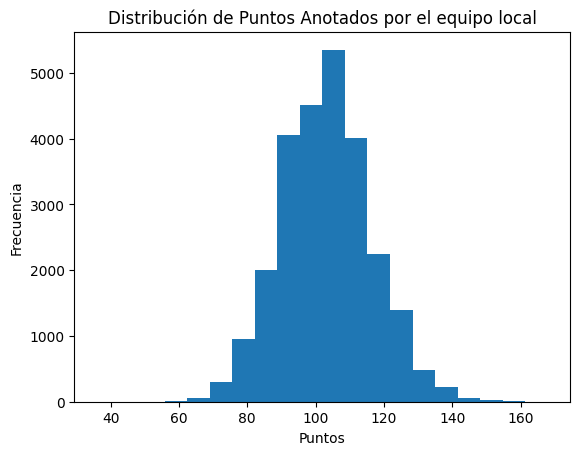

In [73]:
plt.hist(df['PTS_home'], bins=20)
plt.title('Distribución de Puntos Anotados por el equipo local')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')
plt.show()

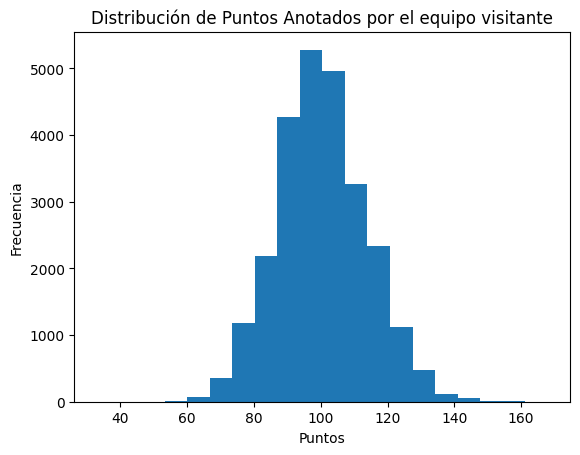

In [74]:
plt.hist(df['PTS_away'], bins=20)
plt.title('Distribución de Puntos Anotados por el equipo visitante')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')
plt.show()

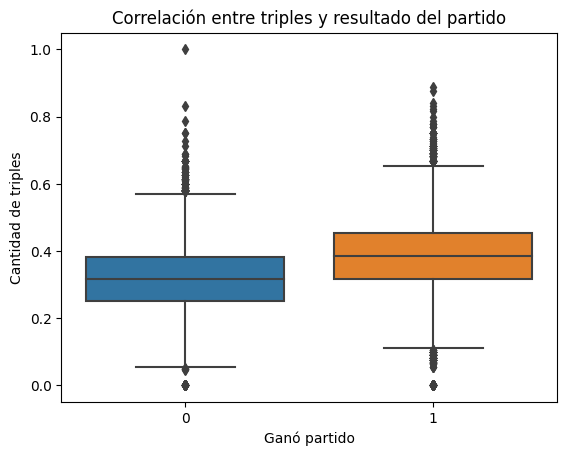

In [75]:
# creamos el diagrama de caja
sns.boxplot(x="HOME_TEAM_WINS", y="FG3_PCT_home", data= df)

# agregar etiquetas a los ejes y título
plt.xlabel("Ganó partido")
plt.ylabel("Cantidad de triples")
plt.title("Correlación entre triples y resultado del partido")

# mostrar el gráfico
plt.show()

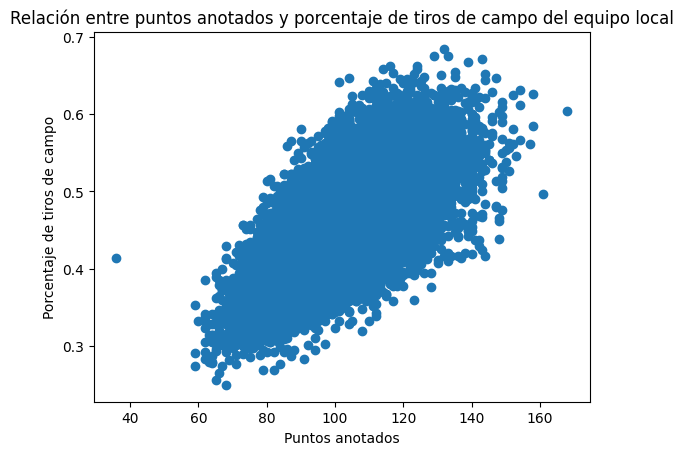

In [76]:
plt.scatter(df['PTS_home'], df['FG_PCT_home'])
plt.title('Relación entre puntos anotados y porcentaje de tiros de campo del equipo local')
plt.xlabel('Puntos anotados')
plt.ylabel('Porcentaje de tiros de campo')
plt.show()

#### Se puede observar un **relación positiva entre la cantidad de tiros y el porcentaje de tiros de campo** como es esperable por lo tanto la data es consistente. 

In [77]:
#Podemos estudiar la proporción de victorias del equipo local lo que nos puede ilustrar bastante la el impacto de ser local en términos de victoria:
prop_victorias = df['HOME_TEAM_WINS'].mean()
print(f"La proporción de victorias del equipo local es {prop_victorias:.2f}")


La proporción de victorias del equipo local es 0.59


## Analisis descriptivo con seaborn: 

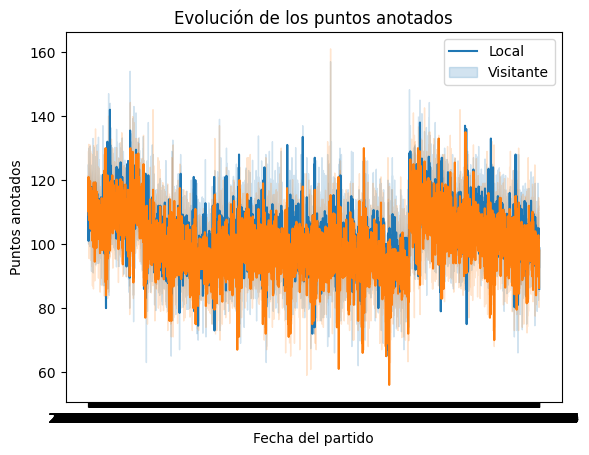

In [78]:
#gráfico de líneas para la cantidad de puntos anotados por el equipo local
sns.lineplot(x="GAME_DATE_EST", y="PTS_home", data=df)
#gráfico de líneas para la cantidad de puntos anotados por el equipo visitante
sns.lineplot(x="GAME_DATE_EST", y="PTS_away", data=df)

# Agregar títulos y etiquetas de los ejes
plt.title("Evolución de los puntos anotados")
plt.xlabel("Fecha del partido")
plt.ylabel("Puntos anotados")
plt.legend(["Local", "Visitante"])
plt.show()

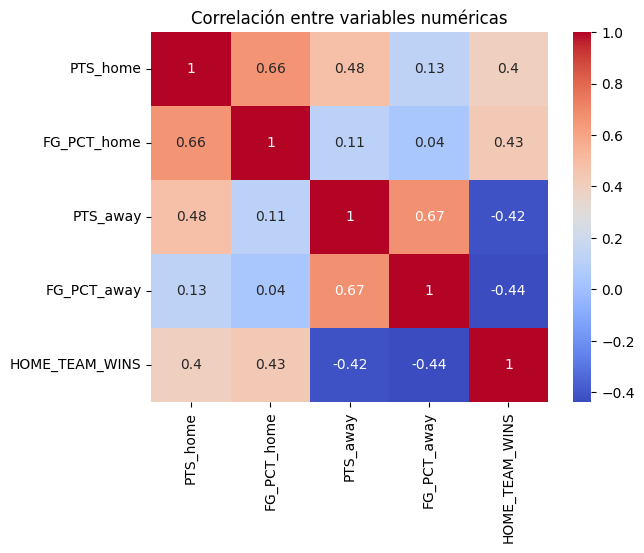

In [79]:
# Seleccion de las variables numéricas para el heatmap
heatmap_vars = df[['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away', 'HOME_TEAM_WINS']]

# mapa de calor para la correlación entre las variables
sns.heatmap(heatmap_vars.corr(), annot=True, cmap='coolwarm')

#  título
plt.title("Correlación entre variables numéricas")
plt.show()

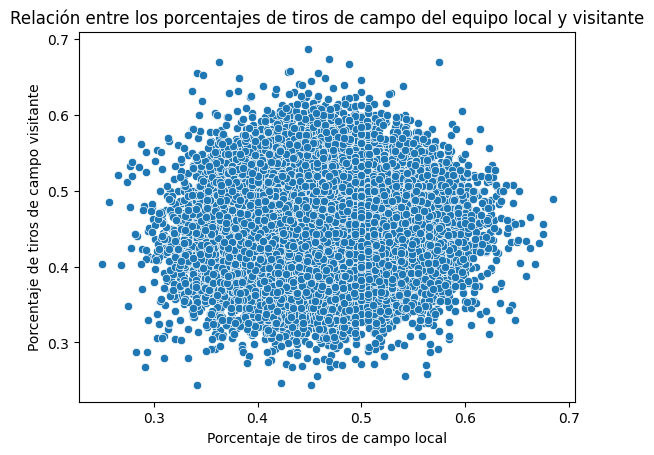

In [80]:
sns.scatterplot(x="FG_PCT_home", y="FG_PCT_away", data=df)

# Agregar títulos y etiquetas de los ejes
plt.title("Relación entre los porcentajes de tiros de campo del equipo local y visitante")
plt.xlabel("Porcentaje de tiros de campo local")
plt.ylabel("Porcentaje de tiros de campo visitante")
plt.show()

# Preguntas e Hipotesis:
Al ver la distribucion y los comportamientos de los datos en los graficos , se pueden sacar algunas conclusiones:

Al analizar la sumatoria de los cohortes por temporada tanto para visita como para local los resultados son similares por lo que **no se pueden concluir grandes diferencias**.

La distrbución de puntos entre el equipo de casa y el visitante es **relativamente similar**. 

En el gráfico de caja podemos observar en general **cuando el equipo de casa ganó, convirtió mas triples** durante el partido.

Se puede observar un **relación positiva entre la cantidad de tiros y el porcentaje de tiros de campo** como es esperable por lo tanto la data es consistente. 

**Cuando el equipo juega de local, gana en un 60%** de los casos lo que arroja la idea de que podría ser correcta nuestra hipótesis inicial.

Se puede observar un **relación positiva entre la cantidad de tiros y el porcentaje de tiros de campo** como es esperable por lo tanto la data es consistente. 

El equipo local obtiene **mayor cantidad de puntos con el paso del tiempo** que el equipo de visitante.

Hay **correlaciones altas entre los puntos anotados tanto de visita como local y los porcentajes de tiros de campo**. 

No se puede concluir nada de la este gráfico, **parece no existir una tendencia o corelación clara**, por lo que no sirve para la interpretación visual.

En base a lo dicho, podemos formular algunas preguntas que nos guiaran en el proceso de establecer los puntos de interes:

#### **¿Tiene alguna ventaja significativa el equipo local?**

La hipótesis inicial es que la localía debería suponer una ventaja por diversar razones que a priori parecen lógicas: el apoyo del público, el descanso (ya que los jugadores juegan en su ciudad y no deben desplazarse), conocer la cancha y el efecto psicológico. En este sentido queremos averiguar si la localía además de influir en las victorias del equipo también influye en las estadísticas del mismo. De manera mas formal , se diria que:

Hipótesis Nula: No hay diferencia estadísticamente significativa en los puntos convertidos por el equipo local y el equipo visitante. Es decir, las medias de ambos grupos son iguales.

Hipótesis Alternativa: Sí hay una diferencia estadísticamente significativa entre los puntos convertidos por el equipo local y el equipo visitante, lo que podría sugerir una ventaja para el equipo que juega en casa.




En términos estadísticos tenemos que: 

H0: μ_local = μ_visitante (no hay diferencia estadísticamente significativa en las medias de puntos convertidos por el equipo local y el equipo visitante).

H1: μ_local ≠ μ_visitante (hay una diferencia estadísticamente significativa en las medias de puntos convertidos por el equipo local y el equipo visitante).

Donde: 

 μ_local: media de puntos convertidos por el equipo local
 
 μ_visitante: media de puntos convertidos por el equipo visitante.
 
 

In [81]:
print(df.columns)

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')


In [82]:
# probamos la hipótesis alternativa, queremos una confianza del 95%:

from scipy.stats import ttest_ind

# separar los datos en dos grupos: equipo local y equipo visitante
local_scores = df['PTS_home'][df['HOME_TEAM_WINS'] == 1]
visitor_scores = df['PTS_away'][df['HOME_TEAM_WINS'] == 0]

# realizar una prueba t de dos muestras para comparar las medias
t_stat, p_val = ttest_ind(local_scores, visitor_scores, equal_var=False)

# imprimir los resultados
print("Estadística t: ", t_stat)
print("Valor p: ", p_val)

#Se establece un valor de confianza para ver cual es la diferencia que debe haber para concluir ante una diferencia de medias
confidence = 0.95
significance = 1-confidence
print('Nuestro valor de confianza es de {}% , su nivel de significancia es de {}%, el valor p dado es de {}'.format(round((confidence*100),2),round((significance*100),2),p_val*10))
if p_val>significance:
    print(f'Se rechaza H1 ,se acepta se acepta H0 ({p_val}>{significance})')
else:
    print(f'Se rechaza H0 , se acepta H1 ({p_val}<{significance})')

Estadística t:  3.575394156008683
Valor p:  0.0003504257489290094
Nuestro valor de confianza es de 95.0% , su nivel de significancia es de 5.0%, el valor p dado es de 0.003504257489290094
Se rechaza H0 , se acepta H1 (0.0003504257489290094<0.050000000000000044)


El valor p obtenido (usando la prueba t) es 0.0004, lo que sugiere que **hay una diferencia estadísticamente significativa en los puntos anotados por los equipos locales y visitantes**, y que la hipótesis alternativa es más probable que la hipótesis nula.

En general, un valor p menor que 0.05 indica que hay una fuerte evidencia en contra de la hipótesis nula, mientras que un valor p mayor que 0.05 sugiere que no hay suficiente evidencia para rechazar la hipótesis nula.

Todo esto con una confianza del 95% 

In [83]:
#También realizamos una tabla ANOVA para realizar el cálculo de una manera alternativa: 

from scipy.stats import f_oneway

# seleccionar las variables relevantes
df_sel = df[['HOME_TEAM_WINS', 'PTS_home', 'PTS_away']]

# crear una nueva columna para la diferencia de puntos
df['PTS_diff'] = abs(df_sel['PTS_home'] - df_sel['PTS_away'])


# crear una nueva columna para la variable categórica
df['Location'] = ['Local' if x == 1 else 'Visitante' for x in df['HOME_TEAM_WINS']]

# realizar la prueba ANOVA
#print(nba[nba['Location'] == 'Local']['PTS_diff'].mean(), nba[nba['Location'] == 'Visitante']['PTS_diff'].mean())
f_stat, p_value = f_oneway(df[df['Location'] == 'Local']['PTS_diff'], 
                           df[df['Location'] == 'Visitante']['PTS_diff'])

# imprimir los resultados
print("F-estadístico:", f_stat)
print("Valor p:", p_value)
if p_value>significance:
    print(f'Se rechaza H1 ,se acepta se acepta H0 ({p_val}>{significance})')
else:
    print(f'Se rechaza H0 , se acepta H1 ({p_val}<{significance})')

F-estadístico: 270.5529215380032
Valor p: 1.753150664669047e-60
Se rechaza H0 , se acepta H1 (0.0003504257489290094<0.050000000000000044)


El cálculo de la ANOVA nos **confirma lo realizado anteriormente** por el test t. 

# Planteamiento segunda hipótesis

Otra forma de saber si es que el equipo local tiene una ventaja sobre el equipo visitante es revisando el rendimiento como porcentaje de tiros convertidos, es decir, de los tiros que intentó el equipo, cuantos anoto. En este sentido se pueden establecer dos hipótesis: 

Hipótesis nula (H0): No hay diferencia significativa en el porcentaje de tiros de campo convertidos entre el equipo local y el equipo visitante durante los partidos de la NBA.

Hipótesis alternativa (H1): El porcentaje de tiros de campo convertidos por el equipo local es significativamente mayor que el porcentaje de tiros de campo convertidos por el equipo visitante durante los partidos de la NBA.

In [84]:
from scipy.stats import ttest_ind

# Filtramos los datos correspondientes a los partidos jugados como local y visitante

juego_local = df[(df['GAME_STATUS_TEXT'] == 'Final') & (df['HOME_TEAM_WINS'] == 1)]

juego_visitante = df[(df['GAME_STATUS_TEXT'] == 'Final') & (df['HOME_TEAM_WINS'] == 0)]

# Realizamos un test t de Student para evaluar la diferencia entre los porcentajes de tiros de campo convertidos por el equipo local y el equipo visitante
# Para probar si sample1 es mayor que sample2
t, p_value = ttest_ind(juego_local['FG_PCT_home'], juego_visitante['FG_PCT_away'], alternative='greater')

# Imprimimos el resultado del test
print(f'El valor p de la prueba de hipotesis bilateral con t de student es : {p_value} y t: {t}')
if p_value>significance:
    print(f'Se rechaza H1 ,se acepta se acepta H0 ({p_val}>{significance})')
else:
    print(f'Se rechaza H0 , se acepta H1 ({p_val}<{significance})')

El valor p de la prueba de hipotesis bilateral con t de student es : 8.426645172016608e-05 y t: 3.7625949839765043
Se rechaza H0 , se acepta H1 (0.0003504257489290094<0.050000000000000044)


Hay evidencia que demuestra que el **porcentaje de anotaciones de cada tiro de local es mayor que de visitante**

# Conclusion de objetivo 

En base a los resultados de los graficos y las pruebas de hipotesis:

**La distribucion de los puntajes de locales agrupados y visitantes agrupados es similar**

**Cuando el local ganá, posee un porcentaje mayor de triples durante el partido**

**El equipo local tiene mayor probabilidad de anotar que el visitante**

**El equipo local tiene mayor probabilidad de ganar (del 60% aproximadamente)**


# Estructurando un proyecto de DS lll: Machine learning
## Feature Selection: Análisis de Componentes Principales (PCA)

El método de Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica comúnmente utilizada para reducir la dimensionalidad de los datos mediante la identificación de las variables que explican la mayor cantidad de variabilidad en el conjunto de datos. En el caso del dataset de la NBA, que contiene información sobre múltiples variables estadísticas de los partidos, puede ser útil aplicar PCA para reducir la dimensión del conjunto de datos y facilitar el análisis y la visualización de los patrones de datos. Al utilizar PCA, se pueden identificar las variables más importantes para explicar la variabilidad en los datos y reducir la complejidad del modelo, lo que puede llevar a una mayor eficiencia computacional y una mejor interpretación de los resultados. Además, el PCA puede ser una herramienta útil para la detección de patrones y relaciones no evidentes en los datos.

Para comenzar , utilizaremos la libreria de "sklearn" que nos provee las herramientas necesarias para la creacion del modelo y analiticas del mismo:

    "pip install -U scikit-learn"

In [85]:
print(df.columns)

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'PTS_diff', 'Location'],
      dtype='object')


In [86]:
from sklearn.decomposition import PCA
import numpy as np

# Ignoramos la variable Target ('HOME_TEAM_WINS')y las variables que son de referencia a los equipos para que no estropee la estadistica del PCA
# Seleccionamos las columnas relevantes
df_features = df[['PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home','PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away']]
# Normalizamos los datos
df_features_normalized = (df_features - df_features.mean()) / df_features.std() 
# Creamos PCA con dos componentes principales
pca = PCA(n_components=2)
# Ajustamos
pca.fit(df_features_normalized)
# Obtenemos las componentes principales
components = pca.components_

feature_names = df_features.columns

# Iterar sobre las componentes
for i, component in enumerate(components):
    # Ordenar los índices de los pesos de mayor a menor
    sorted_indices = np.argsort(-component)
    
    # Mostrar el nombre de la componente
    print(f"Componente {i+1}:")
    
    # Iterar sobre los índices ordenados y mostrar los nombres de las variables y sus pesos
    for j in sorted_indices:
        print(f"{feature_names[j]}: {component[j]}")

Componente 1:
PTS_home: 0.4246984793777963
PTS_away: 0.41410794096092296
FG_PCT_home: 0.36023422210848566
FG_PCT_away: 0.3517602545592576
AST_home: 0.32386132738009094
AST_away: 0.3152761665901468
FG3_PCT_home: 0.2530138486323489
FG3_PCT_away: 0.24194000267521265
FT_PCT_away: 0.09356816730913596
FT_PCT_home: 0.0915204623987007
REB_away: -0.1562754563856664
REB_home: -0.162026649213563
Componente 2:
FG_PCT_home: 0.39061098605903743
AST_home: 0.3299752391762767
FG3_PCT_home: 0.3204356277333591
PTS_home: 0.28475295806637824
REB_home: 0.22044035458359887
FT_PCT_home: 0.021750055765110576
FT_PCT_away: -0.0520863078273813
REB_away: -0.21876209728224247
PTS_away: -0.31023260667251096
FG3_PCT_away: -0.31231708196821595
AST_away: -0.3203112734115568
FG_PCT_away: -0.3984391611281253


El primer vector indica que la variable con mas peso de la componente 1 es PTS_home, seguida por PTS_away y FG_PCT_home.
El segundo vector indica que la variable con mas peso de la componente 2 es FG_PCT_home, seguida por FG_PCT_away y AST_home.

Asi, podemos establecer que las mejores variables para el entrenamiento del modelo son **"PTS_home" "AST_home" "FG_PCT_away" "PTS_away" "FG_PCT_home"** , por su variabilidad y correlacion

# Entrenamiento de Modelo (LogisticRegression)

Se utilizará un algoritmo de regresión lineal para entrenar un modelo utilizando las dos primeras componentes principales obtenidas a partir de una reducción de dimensionalidad con el método PCA. El modelo se ajusta a los datos de entrenamiento y se utiliza para hacer predicciones sobre los datos de prueba. Se utiliza el coeficiente de determinación R2 para evaluar el rendimiento del modelo, que indica cuánta varianza en la variable objetivo es explicada por el modelo. Si el valor de R2 es cercano a 1, significa que el modelo se ajusta bien a los datos y es capaz de hacer buenas predicciones.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Se establecen las variables  de entrada 
X = df[['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away','AST_home']]
y = df['HOME_TEAM_WINS']
# Se aplica PCA para reducir la dimensionalidad de los datos
pca = PCA(n_components=2)
# Se aplica el algoritmo de PCA al conjunto de datos
X_pca = pca.fit_transform(X)
logreg = LogisticRegression()
logreg.fit(X_pca, y)
# Se dividen los datos para entrenar y testear el modelo
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
# Se evalua la exactitud del modelo
score = logreg.score(X_test, y_test)
print("Exactitud del modelo:", score)

Exactitud del modelo: 0.9840466926070038


Nos da un valor alrededor de 1, significa que el modelo clasifica correctamente todas las instancias del conjunto de datos de prueba. Esto podría ser un indicador de que el modelo está sobreajustando (overfitting) el conjunto de datos de entrenamiento, es decir, el modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien para nuevos datos.

# Validación del modelo 

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicción del conjunto de entrenamiento
y_train_pred = logreg.predict(X_test)
# Métricas
accuracy = accuracy_score(y_train_pred, y_test)
precision = precision_score(y_train_pred, y_test)
recall = recall_score(y_train_pred, y_test)
f1 = f1_score(y_train_pred, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9840466926070038
Precision: 0.9860930030421556
Recall: 0.9871655427452687
F1 score: 0.986628981411023


In [89]:
# Se realiza una matriz de confusión para el modelo de regresión logística
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_train_pred)
print(cm)

[[3049   59]
 [  64 4538]]


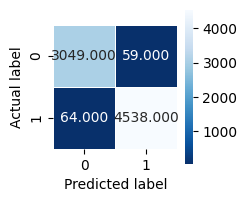

In [90]:
# Se realiza una matriza de confusión para verificar la precisión del modelo de manera grafica.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = metrics.confusion_matrix(y_test, y_train_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


Todas las métricas de este modelo estan dando un valor casi de 1. esto podría ser una señal de que el modelo se está sobreajustando a los datos de entrenamiento y no está generalizando bien para nuevos datos. Esto significa que el modelo se está adaptando demasiado bien a los datos específicos de entrenamiento y está perdiendo la capacidad de generalizar para nuevos datos que no ha visto antes. Como resultado, es posible que el modelo no sea capaz de hacer predicciones precisas para nuevos datos y podría requerir ajustes para mejorar su capacidad de generalización. Por otro lado, también cabe la posibilidad de que el modelo esté sobreajustado porque la cantidad de datos es muy pequeña. 

Tambien se puede ver que la matriz de confusion demuestra valores de error (falsos) relativamente bajos , que puede asociarse a lo anteriormente explicado.

Para nuestros datos , es posible que exista una mejor manera de prediccion y de entrenamiento del modelo, asi, se comprobara el comportamiento con uno distinto que utilizara otro algoritmo para la prediccion de decisiones:

## Feature Selection: Recursive Feature Elimination

La eliminación recursiva de características (Recursive Feature Elimination o RFE) es un método utilizado en aprendizaje automático para seleccionar las características (o variables) más importantes en un conjunto de datos.
El proceso comienza entrenando un modelo con todas las características disponibles, luego se evalúa la importancia de cada una de las características. En función de estas evaluaciones, se eliminan las características menos importantes y se vuelve a entrenar el modelo con el conjunto reducido de características.
Este proceso se repite iterativamente, eliminando las características menos importantes en cada iteración hasta que se alcanza el número deseado de características o hasta que no se pueden eliminar más características sin afectar significativamente el rendimiento del modelo.

In [97]:
from  sklearn.feature_selection import RFE
import numpy as np
from sklearn.linear_model import LinearRegression

# Ignoramos la variable Target ('HOME_TEAM_WINS')y las variables que son de referencia a los equipos para que no estropee la estadistica del PCA
# Seleccionamos las columnas relevantes
df_features = df[['PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home','PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away']]
# Normalizamos los datos
df_features_normalized = (df_features - df_features.mean()) / df_features.std() 
# Normalizamos los datos de la variable target
target_normalized = (df['HOME_TEAM_WINS'] - df['HOME_TEAM_WINS'].mean()) / df['HOME_TEAM_WINS'].std()
# Denominamos las variables para el entrenamiento y el test
X = df_features_normalized
y = target_normalized
# Se le asigna un estimador como parametro al modelo
estimator = LinearRegression()
# Se le proporciona parametros al modelo
selector_rfe = RFE(estimator, n_features_to_select=None)
# Se entrena el modelo y se almacena el 
rfe = selector_rfe.fit(X, y)
# Se obtienen los indices de las variables relevantes
print(selector_rfe.feature_names_in_)
print(selector_rfe.support_)

['PTS_home' 'FG_PCT_home' 'FT_PCT_home' 'FG3_PCT_home' 'AST_home'
 'REB_home' 'PTS_away' 'FG_PCT_away' 'FT_PCT_away' 'FG3_PCT_away'
 'AST_away' 'REB_away']
[ True  True False False  True False  True  True False False  True False]


A diferencia de otros algoritmos , al usar el RFE sera necesaria la iteracion para ir reduciendo la dimension del dataset hasta alcanzar la cantidad de variables de interes, en este caso se hara solo una iteracion nueva:

In [98]:
# Se convierte el atributo feature_names_in_ en un array NumPy
filtered_features_array = np.array(selector_rfe.feature_names_in_)
# Se filtran las características relevantes utilizando el atributo support_
selected_features_rfe= filtered_features_array[selector_rfe.support_]
selected_features_rfe

array(['PTS_home', 'FG_PCT_home', 'AST_home', 'PTS_away', 'FG_PCT_away',
       'AST_away'], dtype=object)

In [99]:
# Se realiza una nueva iteracion con los datos de la iteracion anterior y se establecen como variable
filtered_features = selected_features_rfe.tolist()
X = df_features_normalized[filtered_features]
y = target_normalized
# Se le asigna un estimador como parametro al modelo
estimator = LinearRegression()
# Se le proporciona parametros al modelo
selector_rfe = RFE(estimator, n_features_to_select=None)
# Se entrena el modelo y se almacena el 
rfe = selector_rfe.fit(X, y)
# Se convierte el atributo feature_names_in_ en un array NumPy
filtered_features_array = np.array(selector_rfe.feature_names_in_)
# Se filtran las características relevantes utilizando el atributo support_
selected_features_rfe= filtered_features_array[selector_rfe.support_]
selected_features_rfe

array(['PTS_home', 'AST_home', 'PTS_away'], dtype=object)

Asi se puede concluir que el algoritmo de *"feature selection"* considera como caracteristicas pricipales a **'FG_PCT_home', 'PTS_away', 'FG_PCT_away'** , estableciendo una distinta importancia a las caracteristicas. Sin embargo , poseer baja cantidad de variables puede llevar a predicciones no fiables o de baja precision por la baja variabilidad de los datos , a pesar que en este dataset se poseen un bajo numero de datos y no se pueda verificar este problema.

# Feature selection: SelectKBest

El método SelectKBest es una técnica de selección de características que se utiliza para seleccionar las k características más importantes de un conjunto de datos utilizando un método de puntuación estadística. Es una técnica de selección de características univariante, lo que significa que cada característica se evalúa de forma independiente de las demás características.

SelectKBest utiliza una variedad de pruebas estadísticas, como ANOVA F-test, prueba chi-cuadrado, prueba mutual information, entre otras, para evaluar la relación entre cada característica y la variable objetivo. Luego, selecciona las k características con los puntajes más altos.

Se utilizara la prueba "ANOVA F-test" para hacer la seleccion de variables:

In [94]:
from sklearn.feature_selection import SelectKBest, f_classif

# Ignoramos la variable Target ('HOME_TEAM_WINS')y las variables que son de referencia a los equipos para que no estropee la estadistica del PCA
# Seleccionamos las columnas relevantes
df_features = df[['PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home','PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away']]
# Normalizamos los datos
df_features_normalized = (df_features - df_features.mean()) / df_features.std() 
# Normalizamos los datos de la variable target
target_normalized = (df['HOME_TEAM_WINS'] - df['HOME_TEAM_WINS'].mean()) / df['HOME_TEAM_WINS'].std()
# Denominamos las variables para el entrenamiento y el test
X = df_features_normalized
y = target_normalized

# Seleccionamos las características más importantes utilizando f_classif
selector_skb = SelectKBest(f_classif, k=4)
skb = selector_skb.fit_transform(X, y)

# Imprimimos las características seleccionadas
print(selector_skb.feature_names_in_)
print(selector_skb.get_support())

['PTS_home' 'FG_PCT_home' 'FT_PCT_home' 'FG3_PCT_home' 'AST_home'
 'REB_home' 'PTS_away' 'FG_PCT_away' 'FT_PCT_away' 'FG3_PCT_away'
 'AST_away' 'REB_away']
[ True  True False False False False  True  True False False False False]


In [95]:
# Se convierte el atributo feature_names_in_ en un array NumPy
filtered_features_array_skb = np.array(selector_skb.feature_names_in_)
# Se filtran las características relevantes utilizando el atributo support_
selected_features_skb = filtered_features_array_skb[selector_skb.get_support()]
selected_features_skb

array(['PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away'], dtype=object)

Al poner como objetivo 4 caracteristicas de interes, se puede concluir que el algoritmo de *"feature selection"* considera como caracteristicas pricipales a **'PTS_home', 'FG_PCT_home', 'PTS_away', 'FG_PCT_away'** , que termina similar a la seleccion con el RFE